<a href="https://colab.research.google.com/github/ericthansen/dsc-phase-5-project_work/blob/main/Proj5_DeepFakeID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Beginning

In [ ]:
# Data source: https://www.kaggle.com/datasets/dagnelies/deepfake-faces



In [ ]:
# #GloVe Set-up - 
# # 0) Acquire glove zipped file and put on google drive to use with Colab

# # 1) unzip
# ##only run the following lines once!
# from google.colab import drive
# drive.mount('/content/gdrive')
# #### !unzip gdrive/My\ Drive/DataSciUploads/GloVe/glove.840B.300d.zip


# # 2) make file available
# #GLOVE_PATH = '/content/gdrive/MyDrive/DataSciUploads/GloVe/glove.840B.300d.txt'
# GLOVE_PATH = '/content/gdrive/MyDrive/DataSciUploads/GloVe/glove.6B.300d.txt'


In [ ]:
##Mounting drive - only run final line to re-unzip the jpg images

from google.colab import drive 
drive.mount('/content/gdrive')

DEEPFAKE_ARCHIVE_ZIP_PATH = '/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/archive.zip'
DEEPFAKE_ARCHIVE_PATH = '/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive'
DEEPFAKE_MODEL_SAVE_PATH = '/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/models/'



Mounted at /content/gdrive


In [ ]:
# probably remove this comment
#this is necessary sometimes to rerun; it appears perhaps as though files get corrupted on google drive?  is this possible?
#!unzip -u '/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/archive.zip' -d '/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive'

In [ ]:
DF_AP_FACES = DEEPFAKE_ARCHIVE_PATH+'/faces_224/'

In [ ]:
input_shape = [224, 224, 3]
image_size = input_shape[0]

In [ ]:
RANDOM_SEED = 42
SUMMARIZE = True

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  pass
  #raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
tf.keras.backend.clear_session()

In [ ]:
# ##Not necessary to run every time - just a check on GPU performance
# # testing GPU speedup
# %tensorflow_version 2.x
# import tensorflow as tf
# import timeit

# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   print(
#       '\n\nThis error most likely means that this notebook is not '
#       'configured to use a GPU.  Change this in Notebook Settings via the '
#       'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
#   raise SystemError('GPU device not found')

# def cpu():
#   with tf.device('/cpu:0'):
#     random_image_cpu = tf.random.normal((100, 100, 100, 3))
#     net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
#     return tf.math.reduce_sum(net_cpu)

# def gpu():
#   with tf.device('/device:GPU:0'):
#     random_image_gpu = tf.random.normal((100, 100, 100, 3))
#     net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
#     return tf.math.reduce_sum(net_gpu)
  
# # We run each op once to warm up; see: https://stackoverflow.com/a/45067900
# cpu()
# gpu()

# # Run the op several times.
# print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
#       '(batch x height x width x channel). Sum of ten runs.')
# print('CPU (s):')
# cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
# print(cpu_time)
# print('GPU (s):')
# gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
# print(gpu_time)
# print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

In [ ]:
# Pasted in for reference
# # https://keras.io/applications/
# #look at structure
# from keras.applications import MobileNet
# conv_base = MobileNet(weights='imagenet', 
#                       include_top=True)

# # This is a deep and complex network!
# conv_base.summary()

# '''You'll learn about two ways to use pre-trained networks:

# Feature extraction: Here, you use the representations learned by a previous network to extract interesting features from new samples. These features are then run through a new classifier, which is trained from scratch.

# Fine-tuning: When fine-tuning, you'll "unfreeze" a few top layers from the model and train them again together with the densely connected classifier. Note that you are changing the parts of the convolutional layers here that were used to detect the more abstract features. By doing this, you can make your model more relevant for the classification problem at hand.'''

# #feature extraction
# '''Feature Extraction
# Feature extraction with convolutional neural networks means that you take the convolutional base of a pretrained network, run new data through it, and train a new classifier on top of the output (a new densely connected classifier). Why use convolutional base but new dense classifier? Generally, patterns learned by the convolutional layers are more generalizable.

# Note that, if your dataset differs a lot from the dataset used when pretraining, it might even be worth only using part of the convolutional base (see "fine tuning")

# Also, with feature extraction, there are two ways running the model:

# You can run the convolutional base over your dataset, save its output, then use this data as input to a standalone, densely connected network. This solution is pretty fast to run, and you need to run the convolutional base first for every input image. The problem here is, however, that you can't use data augmentation as we've seen before.
# You can extend the convolutional base by adding dense layers on top, and running everything altogether on the input data. This way, you can use data augmentation, but as every input image goes through the convolutional base every time, this technique is much more time-consuming. It's almost impossible to do this without a GPU'''

# #fine tuning
# '''Fine tuning
# Fine tuning is similar to feature extraction in that you reuse the convolution base and retrain the dense, fully connected classifier layers to output a new prediction. In addition, fine tuning also works by retraining the frozen weights for the convolutional base. This allows these weights to be tweaked for the current scenario, hence the name. To do this, you'll freeze part of the model while tuning specific layers.'''
# # http://cs231n.stanford.edu/syllabus.html
# # https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras/
# # https://www.dlology.com/blog/gentle-guide-on-how-yolo-object-localization-works-with-keras-part-2/


In [ ]:
#!pip install -U --upgrade tensorflow



In [ ]:
import sys
import sklearn
import tensorflow as tf

import cv2
import pandas as pd
import numpy as np

import plotly.graph_objs as go
from plotly.offline import iplot
from matplotlib import pyplot as plt
###
from keras.preprocessing.image import ImageDataGenerator
import datetime
from keras import layers
from keras import models

from keras.callbacks import EarlyStopping

!pip install lime
from lime import lime_image

import shutil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=1c62c85a1ec8b56a1a74a2273a8217adb4dfeff4d0bc4858a7f2ff61472b011a
  Stored in directory: /root/.cache/pip/wheels/e6/a6/20/cc1e293fcdb67ede666fed293cb895395e7ecceb4467779546
Successfully built lime


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
import os

# EDA - I

In [ ]:
meta=pd.read_csv('/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/metadata.csv')
meta.head()

,videoname,original_width,original_height,label,original
0,aznyksihgl.mp4,129,129,FAKE,xnojggkrxt.mp4
1,gkwmalrvcj.mp4,129,129,FAKE,hqqmtxvbjj.mp4
2,lxnqzocgaq.mp4,223,217,FAKE,xjzkfqddyk.mp4
3,itsbtrrelv.mp4,186,186,FAKE,kqvepwqxfe.mp4
4,ddvgrczjno.mp4,155,155,FAKE,pluadmqqta.mp4


In [ ]:
meta.shape

(95634, 5)

In [ ]:
meta.describe()

,original_width,original_height
count,95634.000000,95634.000000
mean,164.611174,164.565374
std,60.002852,60.011802
min,36.000000,36.000000
25%,108.000000,107.000000
50%,155.000000,155.000000
75%,223.000000,223.000000
max,665.000000,666.000000


In [ ]:
meta.isna().sum()

videoname              0
original_width         0
original_height        0
label                  0
original           16293
dtype: int64

In [ ]:
len(meta[meta.label=='FAKE']),len(meta[meta.label=='REAL'])

(79341, 16293)

Since there are only just over 16K Real images (and many more Fake ones), we will limit (at the start at least) the analysis to just 32K total images to achieve equal set distribution.

In [ ]:
#update sample_size as necessary!!!
sample_size = 16000

real_df = meta[meta["label"] == "REAL"]
fake_df = meta[meta["label"] == "FAKE"]


real_df = real_df.sample(sample_size, random_state=RANDOM_SEED)
fake_df = fake_df.sample(sample_size, random_state=RANDOM_SEED)

sample_meta = pd.concat([real_df, fake_df])

In [ ]:
from sklearn.model_selection import train_test_split

Train_set, Test_set = train_test_split(sample_meta,test_size=0.2,random_state=RANDOM_SEED,stratify=sample_meta['label'])
Train_set, Val_set  = train_test_split(Train_set,test_size=0.3,random_state=RANDOM_SEED,stratify=Train_set['label'])

In [ ]:
def make_jpg_filename_col(set_in):
  set_out = set_in.assign(jpg_filename = lambda x: (x['videoname'].str[:-4]+'.jpg'))
  return set_out

Train_set = make_jpg_filename_col(Train_set)
Val_set = make_jpg_filename_col(Val_set)
Test_set = make_jpg_filename_col(Test_set)


Current workaround attempt - copy file from google drive to colab local

In [ ]:
!mkdir "/content/deepfake_files/"

In [ ]:
shutil.copy("/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/archive.zip", "/content/deepfake_files/archive.zip")
#shutil.copy("/content/deepfake_files/archiveBAK.zip", "/content/gdrive/MyDrive/DataSciUploads/DeepFakeArchive/archive.zip")

'/content/deepfake_files/archive.zip'

In [ ]:
!unzip -u '/content/deepfake_files/archive.zip' -d '/content/deepfake_files/archive/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/deepfake_files/archive/faces_224/yppwksjuui.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yppybofyww.jpg  
  inflating: /content/deepfake_files/archive/faces_224/ypqjxdwawy.jpg  
  inflating: /content/deepfake_files/archive/faces_224/ypqsxalhkw.jpg  
  inflating: /content/deepfake_files/archive/faces_224/ypqxbbydxe.jpg  
  inflating: /content/deepfake_files/archive/faces_224/ypqzrivawi.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprdarrkit.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprhthcacq.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprmkhffdi.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprnmqkhga.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprqkgcoid.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprsoygtjn.jpg  
  inflating: /content/deepfake_files/archive/faces_224/yprxcbpmaj.jpg  
  inflating: 

In [ ]:
colab_link = "/content/deepfake_files/archive/"
colab_faces = colab_link+"faces_224/"

In [ ]:
Train_set.shape,Val_set.shape,Test_set.shape

((2800, 6), (1200, 6), (1000, 6))

In [ ]:
y = dict()

y[0] = []
y[1] = []

for set_name in (np.array(Train_set['label']), np.array(Val_set['label']), np.array(Test_set['label'])):
    y[0].append(np.sum(set_name == 'REAL'))
    y[1].append(np.sum(set_name == 'FAKE'))

trace0 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[0],
    name='REAL',
    marker=dict(color='#33cc33'),
    opacity=0.7
)
trace1 = go.Bar(
    x=['Train Set', 'Validation Set', 'Test Set'],
    y=y[1],
    name='FAKE',
    marker=dict(color='#ff3300'),
    opacity=0.7
)

data = [trace0, trace1]
layout = go.Layout(
    title='Count of classes in each set',
    xaxis={'title': 'Set'},
    yaxis={'title': 'Count'}
)

fig = go.Figure(data, layout)
iplot(fig)

In [ ]:
Train_set.head()

,videoname,original_width,original_height,label,original,jpg_filename
70274,akcnfhxoqh.mp4,186,185,FAKE,rqqddqqfpi.mp4,akcnfhxoqh.jpg
1519,ryebdxmqaq.mp4,186,186,REAL,NaN,ryebdxmqaq.jpg
80442,vnwbsatlha.mp4,185,186,FAKE,iwnfvkmktq.mp4,vnwbsatlha.jpg
85466,yfcmcnjvub.mp4,186,185,REAL,NaN,yfcmcnjvub.jpg
40703,uioxplbbbt.mp4,223,223,REAL,NaN,uioxplbbbt.jpg


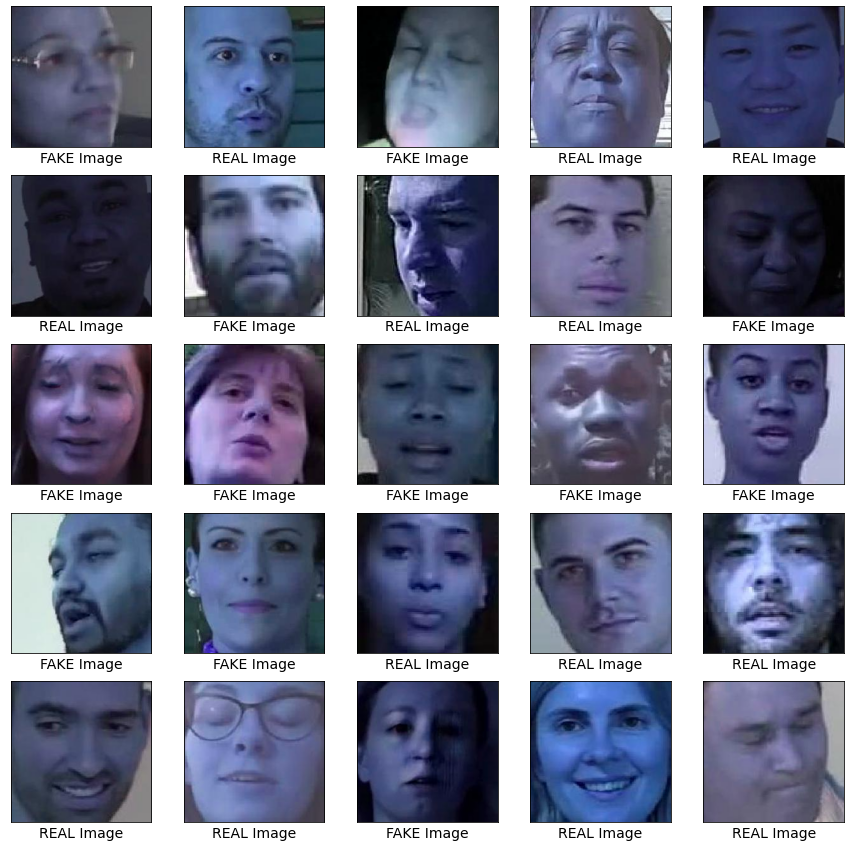

In [ ]:
plt.figure(figsize=(15,15))
for cur,i in enumerate(Train_set.index[:25]):
    #print(i)
    plt.subplot(5,5,cur+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #colab_link = "/content/deepfake_files/archive/"
    plt.imshow(cv2.imread(colab_link+'/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))
    
    if(Train_set.loc[i,'label']=='FAKE'):
        plt.xlabel('FAKE Image')
    else:
        plt.xlabel('REAL Image')
        
plt.show()

# Baseline model setup  

First, create train/test sets and labels.  Training data is already taken care of, but labels must be pulled in from the metadata file.

In [ ]:
def retrieve_dataset(set_name):
    images,labels=[],[]
    for (img, imclass) in zip(set_name['videoname'], set_name['label']):
        # if img[0]=='a':
        #   print(img)
        #   display(cv2.imread(colab_faces+img[:-4]+'.jpg'))
        images.append(cv2.imread(colab_faces+img[:-4]+'.jpg'))
        if(imclass=='FAKE'):
            labels.append(1)
        else:
            labels.append(0)
    
    return np.array(images),np.array(labels)

In [ ]:
X_train,y_train=retrieve_dataset(Train_set)
X_val,y_val=retrieve_dataset(Val_set)
X_test,y_test=retrieve_dataset(Test_set)

# Baseline model begin

In [ ]:
from functools import partial

tf.random.set_seed(RANDOM_SEED) 
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")

model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 401408)           

In [ ]:
history = model.fit(X_train, y_train, epochs=5,batch_size=64,
                    validation_data=(X_val, y_val))

Epoch 1/5
44/44 [==============================] - 24s 445ms/step - loss: 391.0775 - accuracy: 0.4968 - val_loss: 0.6930 - val_accuracy: 0.5108
Epoch 2/5
44/44 [==============================] - 16s 374ms/step - loss: 0.7352 - accuracy: 0.5054 - val_loss: 0.6960 - val_accuracy: 0.4850
Epoch 3/5
44/44 [==============================] - 16s 375ms/step - loss: 0.6953 - accuracy: 0.4986 - val_loss: 0.6980 - val_accuracy: 0.5042
Epoch 4/5
44/44 [==============================] - 16s 376ms/step - loss: 0.7034 - accuracy: 0.5232 - val_loss: 0.6999 - val_accuracy: 0.4942
Epoch 5/5
44/44 [==============================] - 16s 376ms/step - loss: 1.5642 - accuracy: 0.5293 - val_loss: 0.6957 - val_accuracy: 0.5092


In [ ]:
score = model.evaluate(X_test, y_test)

32/32 [==============================] - 3s 72ms/step - loss: 0.7047 - accuracy: 0.5060


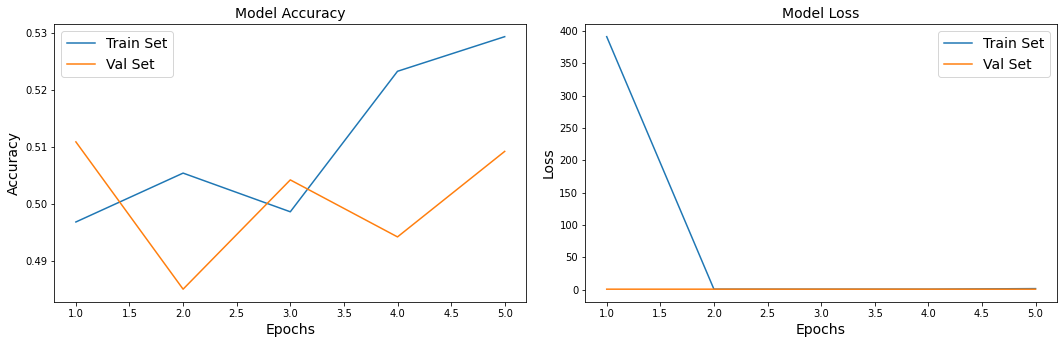

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

Okay, so we have a baseline model which has ~50% accuracy, we can go from here.

# Pretrained models

As mentioned in lessons, there are several pretrained models which can be good starting points for these types of tasks. 
Keras documentation performance can be found here:  
https://keras.io/api/applications/  


## VGG19


In [ ]:
import datetime

start = datetime.datetime.now()
#
import os, shutil
import time
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator#, array_to_img
#tf.keras.utils.array_to_img(
from keras.utils import array_to_img

from keras import models
from keras import layers
from keras import optimizers

np.random.seed(RANDOM_SEED)

#
train_folder = 'split/train'
test_folder = 'split/test'
val_folder = 'split/validation'
#
datagen = ImageDataGenerator(rescale=1./255) 
batch_size = 10
##vgg19 feature extraction
from tensorflow.keras.applications import VGG19
cnn_base = VGG19(weights='imagenet', 
                 include_top=False, 
                 input_shape=(64, 64, 3))
                 #input_shape=(224, 224, 3)) #turn this on if include_top=True
    
#
cnn_base.summary()
##


80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                              

In [ ]:
model = models.Sequential()
model.add(cnn_base)
model.add(layers.Flatten())
model.add(layers.Dense(132, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

for layer in model.layers:
    print(layer.name, layer.trainable)

##freezing
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, you can check how many trainable weights are in the model
print(len(model.trainable_weights))

#
cnn_base.trainable = False
##check
# You can check whether a layer is trainable (or alter its setting) through the layer.trainable attribute
for layer in model.layers:
    print(layer.name, layer.trainable)
    
# Similarly, we can check how many trainable weights are in the model
print(len(model.trainable_weights))



vgg19 True
flatten True
dense True
dense_1 True
vgg19 True
flatten True
dense True
dense_1 True
36
vgg19 False
flatten True
dense True
dense_1 True
4


In [ ]:
Train_set.info()
Train_set.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2800 entries, 70274 to 69210
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   videoname        2800 non-null   object
 1   original_width   2800 non-null   int64 
 2   original_height  2800 non-null   int64 
 3   label            2800 non-null   object
 4   original         1400 non-null   object
 5   jpg_filename     2800 non-null   object
dtypes: int64(2), object(4)
memory usage: 217.7+ KB


videoname             0
original_width        0
original_height       0
label                 0
original           1400
jpg_filename          0
dtype: int64

In [ ]:
# Reference
'''train_generator=datagen.flow_from_dataframe(
  dataframe=traindf,#traindf has image filenames and labels
  directory="/content/drive/",
  x_col="image",
  y_col="label",
  subset="training",
  batch_size=32,
  seed=42,
  shuffle=True,
  class_mode="categorical",
  target_size=(150,150)
)
'''

'train_generator=datagen.flow_from_dataframe(\n  dataframe=traindf,#traindf has image filenames and labels\n  directory="/content/drive/",\n  x_col="image",\n  y_col="label",\n  subset="training",\n  batch_size=32,\n  seed=42,\n  shuffle=True,\n  class_mode="categorical",\n  target_size=(150,150)\n)\n'

Found 2800 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.
Epoch 1/20
140/140 [==============================] - 17s 64ms/step - loss: 0.7251 - acc: 0.5529 - val_loss: 0.6818 - val_acc: 0.5600
Epoch 2/20
140/140 [==============================] - 9s 66ms/step - loss: 0.6754 - acc: 0.5871 - val_loss: 0.6803 - val_acc: 0.5742
Epoch 3/20
140/140 [==============================] - 8s 60ms/step - loss: 0.6717 - acc: 0.5957 - val_loss: 0.6916 - val_acc: 0.5742
Epoch 4/20
140/140 [==============================] - 9s 63ms/step - loss: 0.6677 - acc: 0.6086 - val_loss: 0.6889 - val_acc: 0.5400
Epoch 5/20
140/140 [==============================] - 8s 60ms/step - loss: 0.6644 - acc: 0.6057 - val_loss: 0.7175 - val_acc: 0.5625
Epoch 6/20
140/140 [==============================] - 9s 61ms/step - loss: 0.6664 - acc: 0.6032 - val_loss: 0.6919 - val_acc: 0.5667
Epoch 7/20
140/140

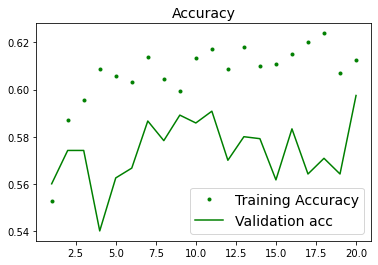

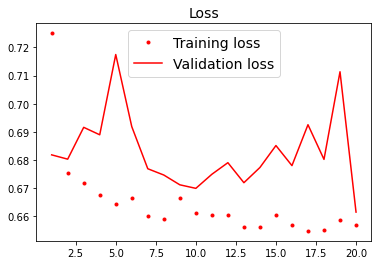

Feature extraction method 2 took 0:02:59.753900 to execute.
Total running time of notebook thus far: 0:03:01.035943
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 132)               270468    
                                                                 
 dense_1 (Dense)             (None, 1)                 133       
                                                                 
Total params: 20,294,985
Trainable params: 270,601
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:

startp = datetime.datetime.now()
#
# Get all the data in the directory split/train (542 images), and reshape them
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')

'''train_generator = train_datagen.flow_from_directory(train_folder,  
                                                    target_size=(64, 64),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary') 
'''
train_generator = train_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Train_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(64, 64),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')
# # Get all the data in the directory split/validation (200 images), and reshape them
val_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')
val_generator = val_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Val_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(64, 64),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

# # Get all the data in the directory split/test (180 images), and reshape them
test_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest')
test_generator = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Test_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(64, 64),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

test_images, test_labels = next(test_generator)
##compile as usual
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-3),
              metrics=['acc'])

##and fit
# ⏰ This cell may take several minutes to run
batch_size = 20
steps_per_epoch = np.ceil(train_generator.n / batch_size)
validation_steps = np.ceil(val_generator.n / batch_size)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

##
train_acc = history.history['acc']
val_acc = history.history['val_acc']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
##
end = datetime.datetime.now()
elapsed = end - startp
print('Feature extraction method 2 took {} to execute.'.format(elapsed))
elapsed = end - start
print('Total running time of notebook thus far: {}'.format(elapsed))
startp = datetime.datetime.now() # Set new start time for new process method
##
##fine tuning
model.summary()


Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

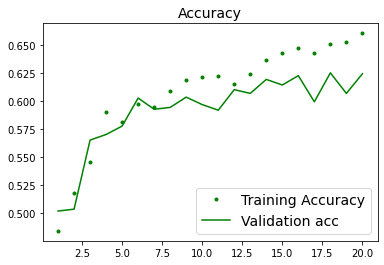

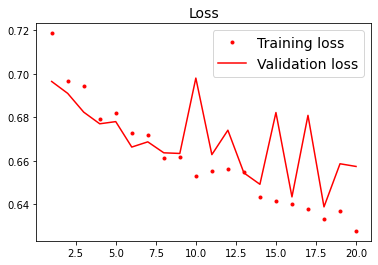

50/50 [==============================] - 2s 43ms/step - loss: 0.6370 - accuracy: 0.6630
test acc: 0.6629999876022339


In [ ]:
## Now, unfreeze the base model layers and train at a lower learning rate
#
cnn_base.summary()
##reminder on fine tuning - feature extraction comes first.  then train final layers, then unfreeze last few layers by unfreezing
#entire thing and then refreezing beginning layers
cnn_base.trainable = True
#
cnn_base.trainable = True
set_trainable = True
for layer in cnn_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False
        
##recompile
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(learning_rate=1e-4), 
              metrics=['accuracy'])

##fit
# ⏰ This cell may take several minutes to run
steps_per_epoch = np.ceil(train_generator.n / batch_size)
validation_steps = np.ceil(val_generator.n / batch_size)
history = model.fit(train_generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=20,
                              validation_data=val_generator,
                              validation_steps=validation_steps)
##
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epch = range(1, len(train_acc) + 1)
plt.plot(epch, train_acc, 'g.', label='Training Accuracy')
plt.plot(epch, val_acc, 'g', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
plt.plot(epch, train_loss, 'r.', label='Training loss')
plt.plot(epch, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
plt.show()
##final eval on test set

test_loss, test_accuracy = model.evaluate(test_generator, steps=50)
print('test acc:', test_accuracy)

In [ ]:
model.save(DEEPFAKE_MODEL_SAVE_PATH+'VGG19_TransferLearning_1.h5')

## MobileNet

In [ ]:
#reference code for early stopping:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto')
# model.fit(xtrain_pad, y=ytrain_enc, batch_size=512, epochs=30, 
#           verbose=1, validation_data=(xvalid_pad, yvalid_enc), callbacks=[earlystop])

In [ ]:
# Let's start with something with lower run-time like ...MobileNet!
input_shape=[224, 224, 3]
image_size = 224
import os
import tensorflow as tf
from tensorflow import keras
import numpy

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )

train_generator = train_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Train_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')
# # Get all the data in the directory split/validation (200 images), and reshape them
val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )
val_generator = val_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Val_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

# # Get all the data in the directory split/test (180 images), and reshape them
test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )
test_generator = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Test_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

Found 2800 validated image filenames belonging to 2 classes.
Found 1200 validated image filenames belonging to 2 classes.
Found 1000 validated image filenames belonging to 2 classes.


In [ ]:
#Removing last dense layers from base model

base_model = tf.keras.applications.MobileNet()
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:

base_model = tf.keras.applications.MobileNet(input_shape=input_shape, include_top=False)
base_model.trainable = False
#include_top removes top layer
base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
#adding new dense layers - add final layer that classifies either as fake or real
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.MobileNet(input_shape=IMG_SHAPE, include_top=False)
base_model.trainable = False

base_model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

base_model.summary()

#these new layers should be trainable by default, but can switch trainability by
# base_model.layers[n].trainable = True


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 1,025
Non-trainable params: 3,228,864
_________________________________________________________________


# BOokmarK

In [ ]:
# Compile the model
learning_rate=1E-4
base_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_generator.n
val_generator.n

1200

In [ ]:
#Fit the model
epochs = 25
batch_size = 100
steps_per_epoch = numpy.ceil(train_generator.n / batch_size)
validation_steps = numpy.ceil(val_generator.n / batch_size)

history = base_model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

##need to train top layer with high learning rate, then unfreeze base and retrain with lower LR.



Epoch 1/25
28/28 [==============================] - 11s 335ms/step - loss: 0.7662 - accuracy: 0.4786 - val_loss: 0.7979 - val_accuracy: 0.4208
Epoch 2/25
28/28 [==============================] - 9s 314ms/step - loss: 0.7333 - accuracy: 0.5196 - val_loss: 0.7391 - val_accuracy: 0.5167
Epoch 3/25
28/28 [==============================] - 9s 339ms/step - loss: 0.7582 - accuracy: 0.4982 - val_loss: 0.7379 - val_accuracy: 0.5167
Epoch 4/25
28/28 [==============================] - 9s 313ms/step - loss: 0.7498 - accuracy: 0.4839 - val_loss: 0.7364 - val_accuracy: 0.5292
Epoch 5/25
28/28 [==============================] - 9s 314ms/step - loss: 0.7480 - accuracy: 0.5125 - val_loss: 0.7400 - val_accuracy: 0.5375
Epoch 6/25
28/28 [==============================] - 9s 312ms/step - loss: 0.7217 - accuracy: 0.5268 - val_loss: 0.7708 - val_accuracy: 0.4750
Epoch 7/25
28/28 [==============================] - 9s 313ms/step - loss: 0.7439 - accuracy: 0.5054 - val_loss: 0.7135 - val_accuracy: 0.5417
Epoch

In [ ]:
for layer in base_model.layers:
    layer.trainable = True
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3,229,889
Trainable params: 3,208,001
Non-trainable params: 21,888
_________________________________________________________________


In [ ]:
learning_rate=1E-5

base_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

epochs = 25
batch_size = 20
steps_per_epoch = numpy.ceil(train_generator.n / batch_size)
validation_steps = numpy.ceil(val_generator.n / batch_size)

history = base_model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps,
                              #callbacks=[earlystop]
                         )

Epoch 1/25
140/140 [==============================] - 47s 311ms/step - loss: 0.8387 - accuracy: 0.5325 - val_loss: 0.7911 - val_accuracy: 0.5350
Epoch 2/25
140/140 [==============================] - 43s 303ms/step - loss: 0.6954 - accuracy: 0.6057 - val_loss: 0.7390 - val_accuracy: 0.5733
Epoch 3/25
140/140 [==============================] - 43s 303ms/step - loss: 0.6529 - accuracy: 0.6275 - val_loss: 0.6729 - val_accuracy: 0.6042
Epoch 4/25
140/140 [==============================] - 43s 303ms/step - loss: 0.6391 - accuracy: 0.6400 - val_loss: 0.6900 - val_accuracy: 0.5967
Epoch 5/25
140/140 [==============================] - 43s 305ms/step - loss: 0.6317 - accuracy: 0.6482 - val_loss: 0.6512 - val_accuracy: 0.6250
Epoch 6/25
140/140 [==============================] - 43s 305ms/step - loss: 0.6050 - accuracy: 0.6682 - val_loss: 0.6458 - val_accuracy: 0.6408
Epoch 7/25
140/140 [==============================] - 43s 304ms/step - loss: 0.5976 - accuracy: 0.6811 - val_loss: 0.6618 - val_ac

In [ ]:
base_model.save(DEEPFAKE_MODEL_SAVE_PATH+'MobileNet_TransferLearning_1.h5')

## XCeption

Now let's try a popular model, XCeption, which has a nice balance of size and accuracy (with a little higher GPU time)

In [ ]:
train_set_raw=tf.data.Dataset.from_tensor_slices((X_train,y_train))
valid_set_raw=tf.data.Dataset.from_tensor_slices((X_val,y_val))
test_set_raw=tf.data.Dataset.from_tensor_slices((X_test,y_test))

In [ ]:
train_set_raw

TypeError: ignored

In [ ]:
tf.keras.backend.clear_session()  # extra code – resets layer name counter

batch_size = 32
preprocess = tf.keras.applications.xception.preprocess_input
train_set = train_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y))
train_set = train_set.shuffle(1000, seed=RANDOM_SEED).batch(batch_size).prefetch(1)
valid_set = valid_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)
test_set = test_set_raw.map(lambda X, y: (preprocess(tf.cast(X, tf.float32)), y)).batch(batch_size)

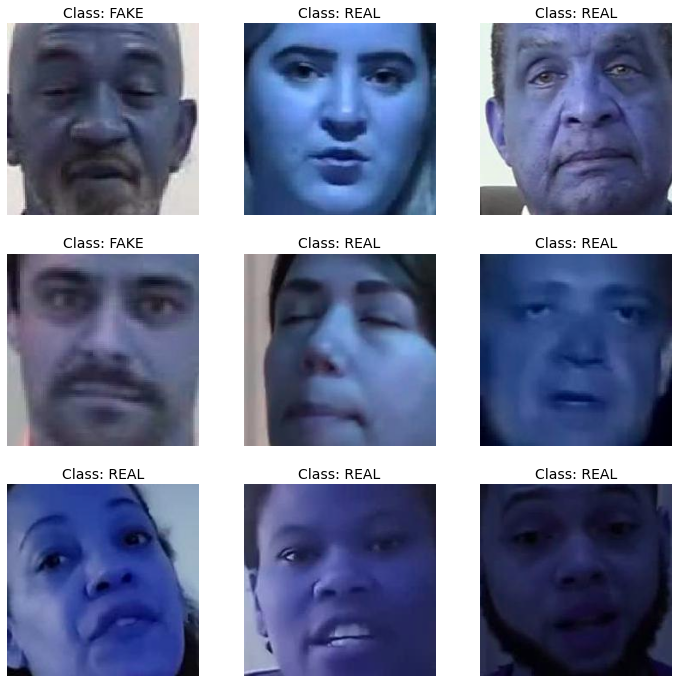

In [ ]:
# extra code – displays the first 9 images in the first batch of valid_set

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal", seed=42),
    tf.keras.layers.RandomRotation(factor=0.05, seed=42),
    #tf.keras.layers.RandomContrast(factor=0.2, seed=42)
])

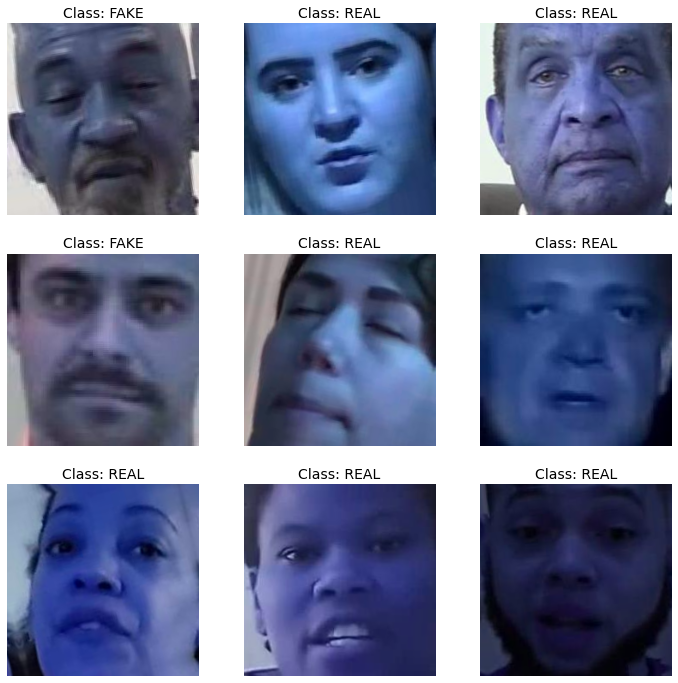

In [ ]:
# extra code – displays the same first 9 images, after augmentation

plt.figure(figsize=(12, 12))
for X_batch, y_batch in valid_set.take(1):
    X_batch_augmented = data_augmentation(X_batch, training=True)
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        # We must rescale the images to the 0-1 range for imshow(), and also
        # clip the result to that range, because data augmentation may
        # make some values go out of bounds (e.g., RandomContrast in this case).
        plt.imshow(np.clip((X_batch_augmented[index] + 1) / 2, 0, 1))
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()

Now load the pretrained model without top layers.  We will replace them with our own customized layers for this project.

In [ ]:
tf.random.set_seed(RANDOM_SEED)  # extra code – ensures reproducibility
base_model = tf.keras.applications.xception.Xception(weights="imagenet",
                                                     include_top=False)
avg = tf.keras.layers.GlobalAveragePooling2D()(base_model.output)
output = tf.keras.layers.Dense(1, activation="sigmoid")(avg)
model = tf.keras.Model(inputs=base_model.input, outputs=output)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Train just the top layers for a few epochs

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
88/88 [==============================] - 19s 191ms/step - loss: 1.0833 - accuracy: 0.5554 - val_loss: 0.7926 - val_accuracy: 0.6233
Epoch 2/5
88/88 [==============================] - 16s 184ms/step - loss: 0.8717 - accuracy: 0.6207 - val_loss: 1.3979 - val_accuracy: 0.5100
Epoch 3/5
88/88 [==============================] - 16s 184ms/step - loss: 0.7259 - accuracy: 0.6529 - val_loss: 1.4380 - val_accuracy: 0.5192
Epoch 4/5
88/88 [==============================] - 16s 186ms/step - loss: 0.7305 - accuracy: 0.6582 - val_loss: 1.1137 - val_accuracy: 0.5617
Epoch 5/5
88/88 [==============================] - 17s 187ms/step - loss: 0.6988 - accuracy: 0.6729 - val_loss: 0.7308 - val_accuracy: 0.6292


In [ ]:
for indices in zip(range(33), range(33, 66), range(66, 99), range(99, 132)):
    for idx in indices:
        print(f"{idx:3}: {base_model.layers[idx].name:22}", end="")
    print()

  0: input_1                33: block4_pool            66: block8_sepconv1_act    99: block11_sepconv2_act  
  1: block1_conv1           34: batch_normalization_2  67: block8_sepconv1       100: block11_sepconv2      
  2: block1_conv1_bn        35: add_2                  68: block8_sepconv1_bn    101: block11_sepconv2_bn   
  3: block1_conv1_act       36: block5_sepconv1_act    69: block8_sepconv2_act   102: block11_sepconv3_act  
  4: block1_conv2           37: block5_sepconv1        70: block8_sepconv2       103: block11_sepconv3      
  5: block1_conv2_bn        38: block5_sepconv1_bn     71: block8_sepconv2_bn    104: block11_sepconv3_bn   
  6: block1_conv2_act       39: block5_sepconv2_act    72: block8_sepconv3_act   105: add_9                 
  7: block2_sepconv1        40: block5_sepconv2        73: block8_sepconv3       106: block12_sepconv1_act  
  8: block2_sepconv1_bn     41: block5_sepconv2_bn     74: block8_sepconv3_bn    107: block12_sepconv1      
  9: block2_sepconv

In [ ]:
model.evaluate(test_set)

32/32 [==============================] - 4s 127ms/step - loss: 0.7037 - accuracy: 0.6170


[0.7036641836166382, 0.6169999837875366]

Performance has increased now after just fine-tuning the top layers.  Let's unfreeze the entire model and train it more.  

NB: Learning rate is now decreased so as to not un-tune the pretrained base layers.

In [ ]:
for layer in base_model.layers[56:]:
    layer.trainable = True

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=optimizer,
              metrics=["accuracy"])
history = model.fit(train_set, validation_data=valid_set, epochs=10)

Epoch 1/10
88/88 [==============================] - 33s 332ms/step - loss: 0.6553 - accuracy: 0.6275 - val_loss: 0.6596 - val_accuracy: 0.6592
Epoch 2/10
88/88 [==============================] - 29s 330ms/step - loss: 0.2909 - accuracy: 0.8725 - val_loss: 1.2177 - val_accuracy: 0.6242
Epoch 3/10
88/88 [==============================] - 30s 335ms/step - loss: 0.1251 - accuracy: 0.9568 - val_loss: 1.9604 - val_accuracy: 0.6183
Epoch 4/10
88/88 [==============================] - 29s 332ms/step - loss: 0.0947 - accuracy: 0.9639 - val_loss: 0.9848 - val_accuracy: 0.6875
Epoch 5/10
88/88 [==============================] - 30s 337ms/step - loss: 0.1227 - accuracy: 0.9536 - val_loss: 0.9299 - val_accuracy: 0.7258
Epoch 6/10
88/88 [==============================] - 30s 339ms/step - loss: 0.0647 - accuracy: 0.9771 - val_loss: 0.8421 - val_accuracy: 0.7242
Epoch 7/10
88/88 [==============================] - 30s 340ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 1.3181 - val_accuracy: 0.6925

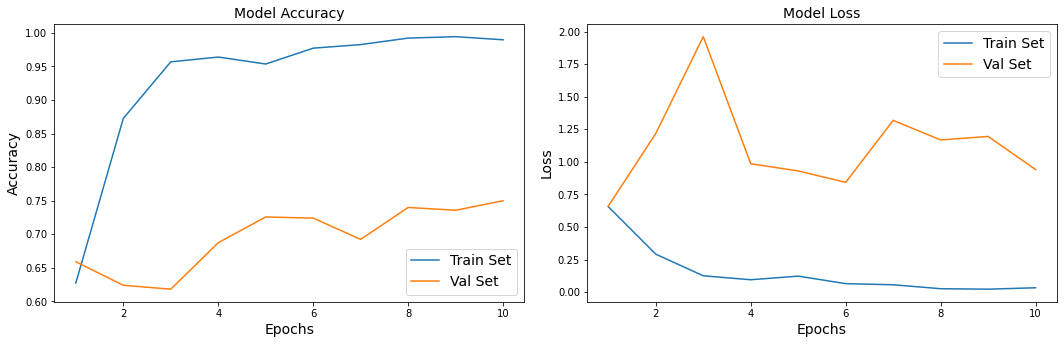

In [ ]:
# plot model performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

In [ ]:
model.evaluate(test_set)

32/32 [==============================] - 4s 131ms/step - loss: 0.9803 - accuracy: 0.7410


[0.9802768230438232, 0.7409999966621399]

Accuracy has improved further.  

In [ ]:
model.save(DEEPFAKE_MODEL_SAVE_PATH+'xception_model.h5')

### See ref for explainability using Lime - can add to all parts

In [ ]:
limesplainer = lime_image.LimeImageExplainer()



In [ ]:
# plt.figure(figsize=(15,15))
# for cur,i in enumerate(Train_set.index[:25]):
#     #print(i)
#     plt.subplot(5,5,cur+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
    
#     plt.imshow(cv2.imread(DEEPFAKE_ARCHIVE_PATH+'/faces_224/'+Train_set.loc[i,'videoname'][:-4]+'.jpg'))
    
#     if(Train_set.loc[i,'label']=='FAKE'):
#         plt.xlabel('FAKE Image')
#     else:
#         plt.xlabel('REAL Image')
        
# plt.show()


# other possible imread: cv2.imread(colab_faces+img[:-4]+'.jpg')

In [ ]:
'''
for X_batch, y_batch in valid_set.take(1):
    for index in range(9):
        plt.subplot(3, 3, index + 1)
        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()
        if(y_batch[index]==1):
            classt='FAKE'
        else:
            classt='REAL'
        plt.title(f"Class: {classt}")
        plt.axis("off")

plt.show()
'''

'\nfor X_batch, y_batch in valid_set.take(1):\n    for index in range(9):\n        plt.subplot(3, 3, index + 1)\n        plt.imshow((X_batch[index] + 1) / 2)  # rescale to 0–1 for imshow()\n        if(y_batch[index]==1):\n            classt=\'FAKE\'\n        else:\n            classt=\'REAL\'\n        plt.title(f"Class: {classt}")\n        plt.axis("off")\n\nplt.show()\n'

In [ ]:
test_set.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
X_test[2,:,:,:]

array([[[ 8,  7, 27],
        [ 9,  8, 28],
        [10,  8, 30],
        ...,
        [ 9,  9, 33],
        [ 9,  9, 33],
        [10, 10, 34]],

       [[ 8,  7, 27],
        [10,  9, 29],
        [11,  9, 31],
        ...,
        [ 9,  9, 33],
        [ 9,  9, 33],
        [10, 10, 34]],

       [[ 7,  8, 29],
        [ 8,  9, 30],
        [ 9, 10, 31],
        ...,
        [ 8,  9, 30],
        [ 9, 10, 31],
        [ 9, 10, 31]],

       ...,

       [[17, 19, 54],
        [19, 21, 56],
        [23, 25, 60],
        ...,
        [ 7,  9, 43],
        [ 6,  8, 42],
        [ 6,  8, 42]],

       [[17, 19, 54],
        [21, 23, 58],
        [25, 27, 62],
        ...,
        [ 7,  9, 43],
        [ 6,  8, 42],
        [ 6,  8, 42]],

       [[18, 20, 55],
        [22, 24, 59],
        [27, 29, 64],
        ...,
        [ 7,  9, 43],
        [ 6,  8, 42],
        [ 6,  8, 42]]], dtype=uint8)

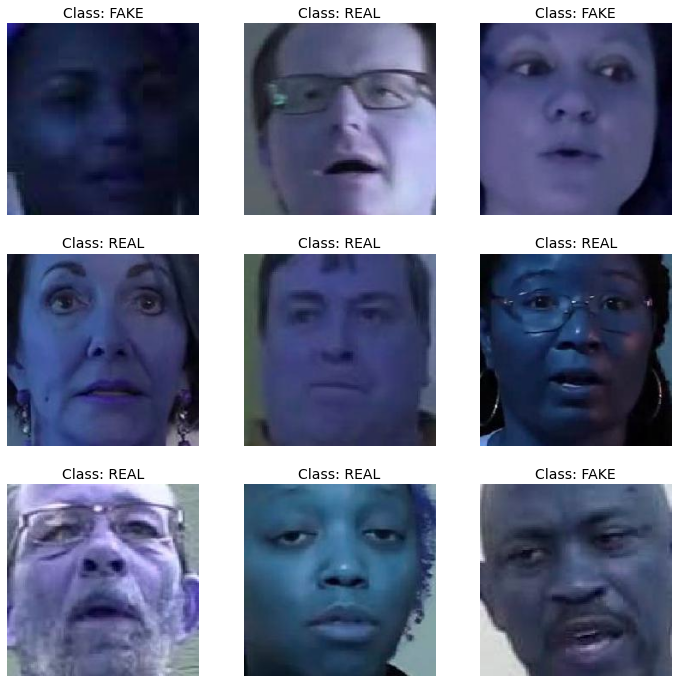

In [ ]:
# FIX THIS CELL?? possibly not necessary.  comes from ref site
plt.figure(figsize=(12, 12))
for x, y in test_set.take(1):
  for index in range(9):
      plt.subplot(3, 3, index + 1)
      #x = data_augmentation(x, training=True)
      plt.imshow((x[index] + 1) / 2)  # rescale to 0–1 for imshow()
      if(y[index]==1):
          classt='FAKE'
      else:
          classt='REAL'
      plt.title(f"Class: {classt}")
      plt.axis("off")

plt.show()

In [ ]:
type(x)
#x.numpy()

tensorflow.python.framework.ops.EagerTensor

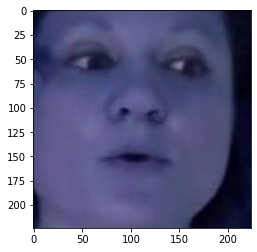

In [ ]:
plt.imshow((x[2] + 1) / 2)

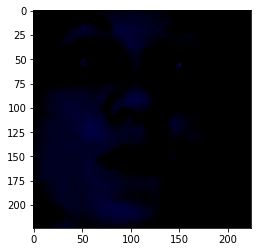

In [ ]:
plt.imshow((x[2]) /1)

In [ ]:
pick = 6
test_data=x[pick,:,:,:]
test_data.shape


TensorShape([224, 224, 3])

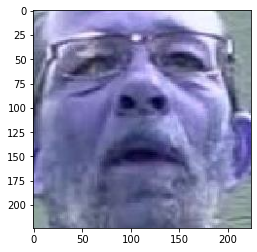

In [ ]:
plt.imshow((test_data + 1) / 2)

In [ ]:
test_data = test_data.numpy()#.astype(np.double)
test_data.shape

(224, 224, 3)

In [ ]:
'''
explainer = lime_image.LimeImageExplainer()
explanation = explainer.explain_instance(
    image, self.model.predict, top_labels=None,
    labels=(target_class,), num_samples=1000)
temp, mask = explanation.get_image_and_mask(
    target_class, positive_only=False, num_features=10, hide_rest=True)
'''

'\nexplainer = lime_image.LimeImageExplainer()\nexplanation = explainer.explain_instance(\n    image, self.model.predict, top_labels=None,\n    labels=(target_class,), num_samples=1000)\ntemp, mask = explanation.get_image_and_mask(\n    target_class, positive_only=False, num_features=10, hide_rest=True)\n'

In [ ]:
#uncomment this to suppress the 1000 lines of output
%%capture  
explanation = limesplainer.explain_instance(((test_data+1)/2).astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000);

(-0.5, 223.5, 223.5, -0.5)

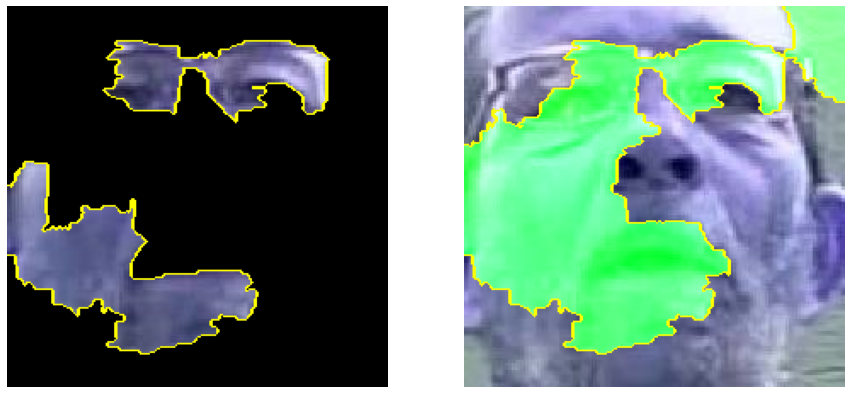

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')


In [ ]:
#uncomment this to suppress the 1000 lines of output
%%capture  
explanation = limesplainer.explain_instance(((test_data)).astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000);

(-0.5, 223.5, 223.5, -0.5)

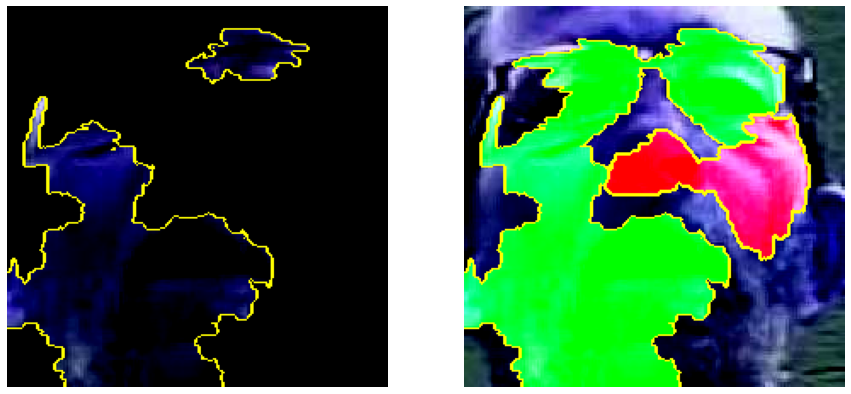

In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')


# end explainer stuff

In [ ]:
# ## from notes
# ##loading the imgs
# # Load the images; be sure to also preprocess these into tensors 

# train_dir = 'cats_dogs_downsampled/train'
# validation_dir = 'cats_dogs_downsampled/val/'
# test_dir = 'cats_dogs_downsampled/test/' 




# original_start = datetime.datetime.now()
# start = datetime.datetime.now()

# ##
# # All images will be rescaled by 1./255
# train_datagen = ImageDataGenerator(rescale=1./255)
# val_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(
#         # This is the target directory
#         train_dir,
#         # All images will be resized to 150x150
#         target_size=(150, 150),
#         batch_size=20,
#         # Since we use binary_crossentropy loss, we need binary labels
#         class_mode='binary')

# validation_generator = val_datagen.flow_from_directory(validation_dir,
#                                                         target_size=(150, 150),
#                                                         batch_size=20,
#                                                         class_mode='binary')

# ##
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(150, 150, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(128, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Flatten())
# model.add(layers.Dense(512, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# ##
# #from keras import optimizers
# from tensorflow.keras import optimizers

# model.compile(loss='binary_crossentropy',
#               optimizer=optimizers.RMSprop(learning_rate=1e-4),
#               metrics=['acc'])

# ##training and evaluating
# # Set the model to train 
# # ⏰ This cell may take several minutes to run 
# history = model.fit(train_generator, 
#                               steps_per_epoch=100, 
#                               epochs=30, 
#                               validation_data=validation_generator, 
#                               validation_steps=20)

# ##plotting
# # Plot history

# import matplotlib.pyplot as plt
# %matplotlib inline 

# acc = history.history['acc']
# val_acc = history.history['val_acc']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))
# plt.plot(epochs, acc, 'bo', label='Training acc')
# plt.plot(epochs, val_acc, 'b', label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()
# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, 'b', label='Validation loss')
# plt.title('Training and validation loss')
# plt.legend()
# plt.show()

# ##
# end = datetime.datetime.now()
# elapsed = end - start
# print('Training took a total of {}'.format(elapsed))
# ##
# #save the model
# # Your code here; save the model for future reference 
# model.save('cats_dogs_downsampled_data.h5')

## EfficientNetV2L 

EfficientNetV2L has among the highest accuracy ratings on Keras's website.  Let's give it a try.

In [ ]:
# tf.keras.applications.EfficientNetV2L(
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     input_shape=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax",
#     include_preprocessing=True,
# )

In [ ]:
input_shape=[224, 224, 3]
image_size = 224
import os
import tensorflow as tf
from tensorflow import keras
import numpy

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )

train_generator = train_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Train_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')




In [ ]:
# # Get all the data in the directory split/validation (200 images), and reshape them
val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )
val_generator = val_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Val_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

In [ ]:
# # Get all the data in the directory split/test (180 images), and reshape them
test_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                   )
test_generator = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame(Test_set), 
                                                    x_col='jpg_filename', y_col='label', 
                                                    directory=colab_faces,
                                                    target_size=(image_size, image_size),  
                                                    batch_size= 20, 
                                                    class_mode= 'binary')

In [ ]:
base_model = tf.keras.applications.EfficientNetV2L()
if SUMMARIZE:
  base_model.summary()

In [ ]:
## can run this cell to verify that we are setting base layers to non-trainable
# base_model = tf.keras.applications.EfficientNetV2L(input_shape=input_shape, include_top=False)
# base_model.trainable = False
# #include_top removes top layer
# if SUMMARIZE:
#   base_model.summary()

In [ ]:
#adding new dense layers - add final layer that classifies either as fake or real
IMG_SHAPE = (224, 224, 3)

base_model = tf.keras.applications.EfficientNetV2L(input_shape=IMG_SHAPE, include_top=False)
base_model.trainable = False

base_model = tf.keras.Sequential([
  base_model,
  keras.layers.GlobalAveragePooling2D(),
  keras.layers.Dense(1, activation='sigmoid')
])

if SUMMARIZE:
  base_model.summary()

#these new layers should be trainable by default, but can switch trainability by
# base_model.layers[n].trainable = True


In [ ]:
# Compile the model
learning_rate = 1E-3
base_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit the model
epochs = 5 #25
batch_size = 20
steps_per_epoch = numpy.ceil(train_generator.n / batch_size)
validation_steps = numpy.ceil(val_generator.n / batch_size)

history = base_model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

##next, need to train top layer with high learning rate, then unfreeze base and retrain with lower LR.



In [ ]:
#unfreeze main model
for layer in base_model.layers:
    layer.trainable = True
if SUMMARIZE:
  base_model.summary()
#recompile with lower LR
learning_rate = 1E-5
base_model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

#refit model
epochs = 25
batch_size = 20
steps_per_epoch = numpy.ceil(train_generator.n / batch_size)
validation_steps = numpy.ceil(val_generator.n / batch_size)

history = base_model.fit(train_generator,
                              steps_per_epoch = steps_per_epoch,
                              epochs=epochs,
                              validation_data=val_generator,
                              validation_steps=validation_steps)

In [ ]:
# save model
base_model.save(DEEPFAKE_MODEL_SAVE_PATH+'EfficientNetV2L_TransferLearning_1.h5')

### EfficientNet explainer with lime

In [ ]:
# set up model- to - explainer stuff here.  May or may not work, without all the rigamarole that was needed for XCeption

In [ ]:
limesplainer = lime_image.LimeImageExplainer()

explanation = limesplainer.explain_instance(((test_data)).astype('double'), model.predict,  
                                         top_labels=3, hide_color=0, num_samples=1000);


In [ ]:
from skimage.segmentation import mark_boundaries

temp_1, mask_1 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
temp_2, mask_2 = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,15))
ax1.imshow(mark_boundaries(temp_1, mask_1))
ax2.imshow(mark_boundaries(temp_2, mask_2))
ax1.axis('off')
ax2.axis('off')

# ideas: use gridsearch to try different learning rates?
# add momentum as well as LR to optimizers